<a href="https://colab.research.google.com/github/ryanleeallred/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
# !pip install --upgrade seaborn

In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [4]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [5]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [6]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [7]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [8]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [9]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [10]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [11]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [12]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [13]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [14]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [15]:
print(income.shape)
print(lifespan.shape)

(46513, 3)
(44370, 3)


In [16]:
# Merge the income and lifespan datasets - "inner"
inc_life_1 = pd.merge(income, lifespan, how="inner", on=["geo", "time"])
print(inc_life_1.shape)  # Only keeps rows that have both "geo" and "time" / "income" and "lifespan" for a given year
inc_life_1.head()

(40437, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [17]:
# Merge the income and lifespan datasets - "outer"
inc_life_2 = pd.merge(income, lifespan, how="outer", on=["geo", "time"])
print(inc_life_2.shape)  # Larger than either of them before merging - keeps all of the rows, even missing ones from either
inc_life_2.head()

(50446, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603.0,28.21
1,afg,1801,603.0,28.20
2,afg,1802,603.0,28.19
3,afg,1803,603.0,28.18
4,afg,1804,603.0,28.17


In [18]:
# Merge the income and lifespan datasets - "left"
inc_life_3 = pd.merge(income, lifespan, how="left", on=["geo", "time"])  # Income on left
print(inc_life_3.shape)  # All of income stays, only matching lifespans are kept
inc_life_3.head()

(46513, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [19]:
# Merge the income and lifespan datasets - "right"
inc_life_4 = pd.merge(income, lifespan, how="right", on=["geo", "time"])  # Lifespan on right
print(inc_life_4.shape)  # All of lifespan stays, only matching incomes are kept
inc_life_4.head()

(44370, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603.0,28.21
1,afg,1801,603.0,28.20
2,afg,1802,603.0,28.19
3,afg,1803,603.0,28.18
4,afg,1804,603.0,28.17


In [20]:
# count duplicates using specific subset of columns
inc_life_2.duplicated(subset=["geo", "time"]).value_counts()

False    50446
dtype: int64

In [21]:
# "inner" is the default; looks automatically for matching columns
df_0 = pd.merge(inc_life_1, population)
print(df_0.shape)
df_0.head()

(40437, 5)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [22]:
df = pd.merge(df_0, entities[["country", "name", "world_4region", "world_6region"]], left_on="geo", right_on="country")
print(df.shape)
df.head()

(40437, 9)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [23]:
df = df.rename(columns = {
   'country': 'country_code',
   'time': 'year',
   'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
   'life_expectancy_years': 'lifespan',
   'population_total': 'population',
   'name': 'country',
   'world_6region': '6region',
   'world_4region': '4region'
})

df.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


## Explore data

In [24]:
print(df.dtypes)

geo              object
year              int64
income            int64
lifespan        float64
population        int64
country_code     object
country          object
4region          object
6region          object
dtype: object


In [25]:
df.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [26]:
df.describe(exclude="number")

,geo,country_code,country,4region,6region
count,40437,40437,40437,40437,40437
unique,187,187,187,4,6
top,est,est,Slovenia,africa,europe_central_asia
freq,219,219,219,11826,10778


In [27]:
usa = df[df["geo"] == "usa"]
usa.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
38028,usa,1800,2127,39.41,6801854,usa,United States,americas,america
38029,usa,1801,2167,39.41,6933517,usa,United States,americas,america
38030,usa,1802,2202,39.41,7067728,usa,United States,americas,america
38031,usa,1803,2166,39.41,7204538,usa,United States,americas,america
38032,usa,1804,2165,39.41,7343995,usa,United States,americas,america


In [28]:
usa.describe()

,year,income,lifespan,population
count,219.000000,219.000000,219.000000,2.190000e+02
mean,1909.000000,14572.936073,54.846256,1.163662e+08
std,63.364028,15066.042247,15.202079,9.738644e+07
min,1800.000000,2113.000000,31.000000,6.801854e+06
25%,1854.500000,3512.500000,39.410000,2.752198e+07
50%,1909.000000,7989.000000,51.780000,9.236198e+07
75%,1963.500000,20090.500000,70.270000,1.962540e+08
max,2018.000000,54898.000000,79.140000,3.267667e+08


In [29]:
usa[usa.year.isin([1818, 1918, 1950])]

,geo,year,income,lifespan,population,country_code,country,4region,6region
38046,usa,1818,2258,39.41,9879049,usa,United States,americas,america
38146,usa,1918,9371,47.18,106721812,usa,United States,americas,america
38178,usa,1950,15317,68.07,158804395,usa,United States,americas,america


In [30]:
china = df[df.country == "China"]
china.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
6836,chn,1800,984,32.0,321675013,chn,China,asia,east_asia_pacific
6837,chn,1801,984,32.0,324408862,chn,China,asia,east_asia_pacific
6838,chn,1802,984,32.0,327165946,chn,China,asia,east_asia_pacific
6839,chn,1803,984,32.0,329946461,chn,China,asia,east_asia_pacific
6840,chn,1804,984,32.0,332750607,chn,China,asia,east_asia_pacific


## Plot visualization

In [31]:
# Seabron plotting
now = df[df.year == 2018]
now.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
218,afg,2018,1867,58.69,36373176,afg,Afghanistan,asia,south_asia
437,ago,2018,5846,65.19,30774205,ago,Angola,africa,sub_saharan_africa
656,alb,2018,12424,78.01,2934363,alb,Albania,europe,europe_central_asia
922,are,2018,68231,76.89,9541615,are,United Arab Emirates,asia,middle_east_north_africa
1141,arg,2018,18942,76.97,44688864,arg,Argentina,americas,america


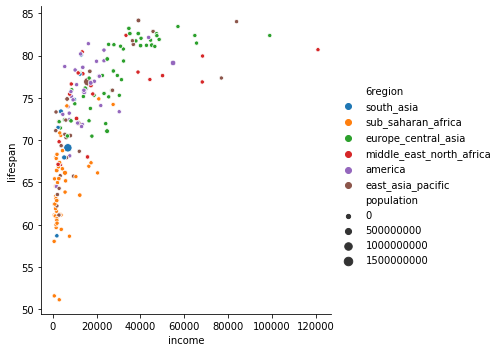

In [32]:
sns.relplot(x="income", y="lifespan", hue="6region", size="population", data=now)

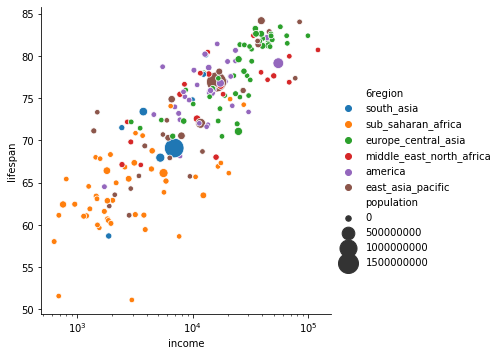

In [33]:
sns.relplot(x="income", y="lifespan", hue="6region", size="population", sizes=(30, 400), data=now)
plt.xscale("log")

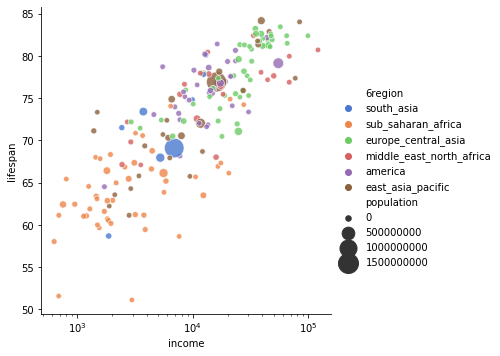

In [34]:
sns.relplot(x="income", y="lifespan", hue="6region", size="population", sizes=(30, 400), alpha=0.8, palette="muted", data=now)
plt.xscale("log")

Text(0.5, 1, 'The World in 2018')

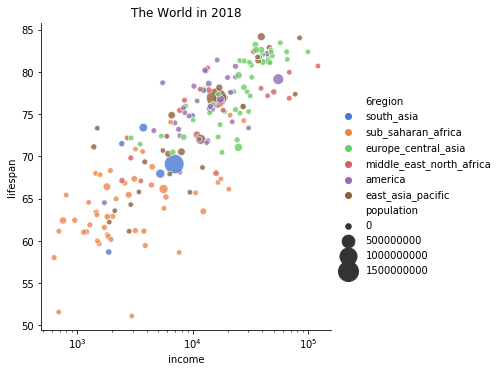

In [35]:
sns.relplot(x="income", y="lifespan", hue="6region", size="population", sizes=(30, 400), alpha=0.8, palette="muted", data=now)
plt.xscale("log")
plt.title("The World in 2018")

In [36]:
then = df[df.year == 1929]
then.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
129,afg,1929,909,30.84,6334276,afg,Afghanistan,asia,south_asia
348,ago,1929,1651,32.01,3776276,ago,Angola,africa,sub_saharan_africa
567,alb,1929,1694,35.54,1010478,alb,Albania,europe,europe_central_asia
833,are,1929,1973,31.77,58999,are,United Arab Emirates,asia,middle_east_north_africa
1052,arg,1929,8279,53.44,11602921,arg,Argentina,americas,america


/Users/Tobias/.vega/dasci/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  # This is added back by InteractiveShellApp.init_path()
/Users/Tobias/.vega/dasci/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


(483.53780335265867, 100000)

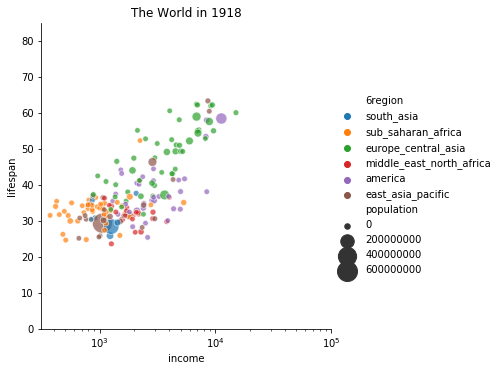

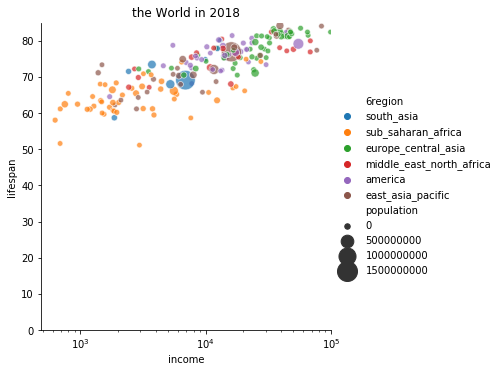

In [38]:
# Use figure / axes syntax from plt in sns
# More common to use it when working with multiple subplots
# With single graph, usually will use plt.
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
            sizes=(30, 400), alpha=0.7, data=then)
plt.xscale("log")
plt.title("The World in 1918")
plt.ylim(0,85)
plt.xlim(0,100000)

sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
            sizes=(30, 400), alpha=0.7, data=now)
plt.xscale("log")
plt.title("the World in 2018")
plt.ylim(0,85)
plt.xlim(0,100000)

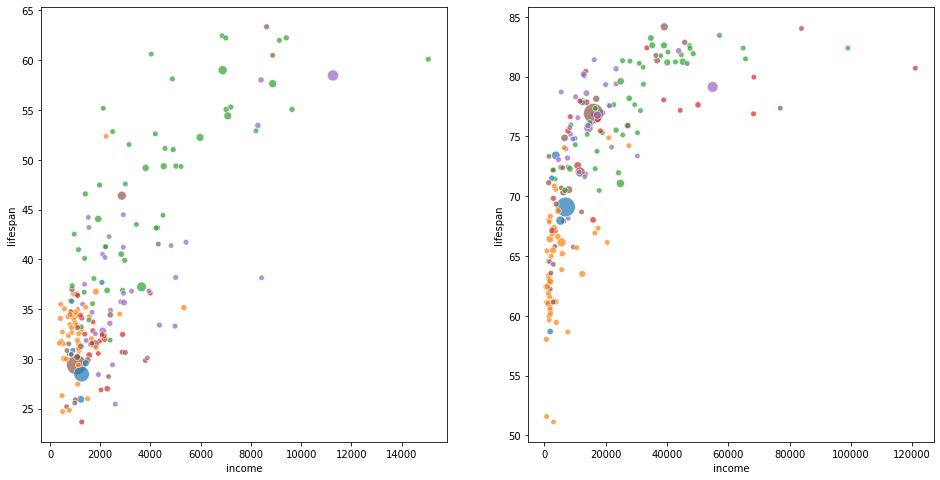

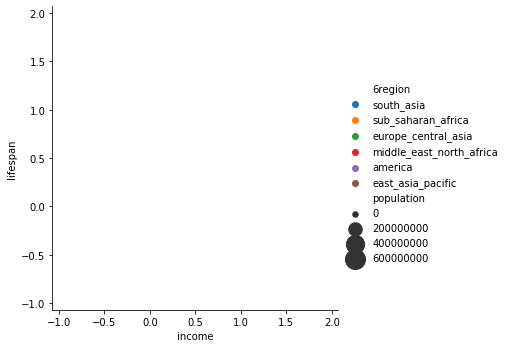

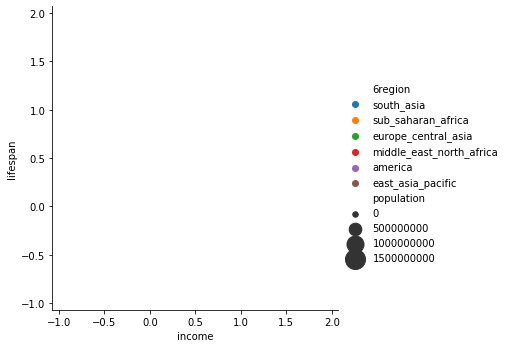

In [39]:
# We *can* still use the figure/axes syntax from matplotlib with seaborn
# but it's much more common to use it when working with multiple subplots
# if we're working with just a single graph, then we typically use 
# plt.blahblahblah (pyplot) syntax with seaborn

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
            sizes=(30, 400), alpha=0.7, data=then, ax=ax[0]);

sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
            sizes=(30, 400), alpha=0.7, data=now, ax=ax[1]);

## Analyze outliers

In [42]:
# Qatar is the richest country in 2018
now.sort_values("income", ascending=False).head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
30362,qat,2018,121033,80.71,2694849,qat,Qatar,asia,middle_east_north_africa
22212,lux,2018,99034,82.39,590321,lux,Luxembourg,europe,europe_central_asia
31895,sgp,2018,83888,84.03,5791901,sgp,Singapore,asia,east_asia_pacific
5521,brn,2018,76943,77.36,434076,brn,Brunei,asia,east_asia_pacific
20241,kwt,2018,68359,79.96,4197128,kwt,Kuwait,asia,middle_east_north_africa


In [44]:
now_qatar = now[now.country == "Qatar"]
now_qatar.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
30362,qat,2018,121033,80.71,2694849,qat,Qatar,asia,middle_east_north_africa


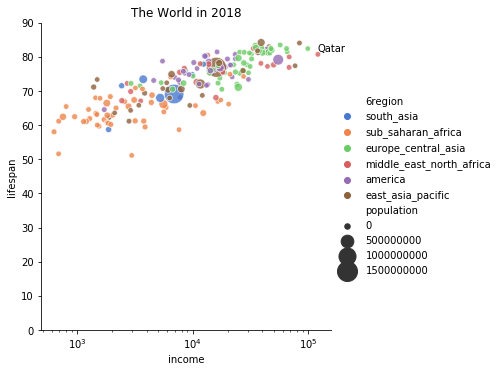

In [45]:
sns.relplot(x="income", y="lifespan", hue="6region", size="population", sizes=(30, 400), alpha=0.8, palette="muted", data=now)
plt.xscale("log")
plt.ylim(0, 90)
plt.title("The World in 2018")
plt.text(x=now_qatar.income-1000, y=now_qatar.lifespan+1, s="Qatar")
plt.show()

## Plot multiple years

In [49]:
years = [1918, 1918, 2018]
centuries = df[df.year.isin(years)]
centuries.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
118,afg,1918,849,7.89,5704092,afg,Afghanistan,asia,south_asia
218,afg,2018,1867,58.69,36373176,afg,Afghanistan,asia,south_asia
337,ago,1918,1174,12.01,3487015,ago,Angola,africa,sub_saharan_africa
437,ago,2018,5846,65.19,30774205,ago,Angola,africa,sub_saharan_africa
556,alb,1918,1478,19.49,953764,alb,Albania,europe,europe_central_asia


IndexError: index 2 is out of bounds for axis 0 with size 2

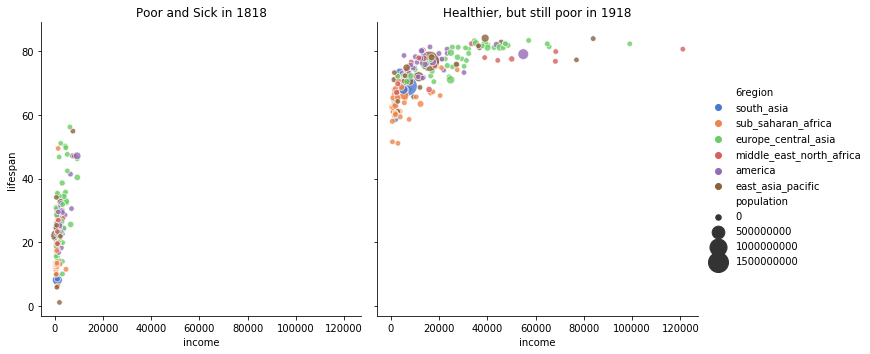

In [50]:
fig = sns.relplot(x="income", y="lifespan", hue="6region", size="population", sizes=(30, 400),
                  col="year", alpha=0.8, palette="muted", data=centuries)

axes = fig.axes.flatten()
axes[0].set_title("Poor and Sick in 1818")
axes[1].set_title("Healthier, but still poor in 1918")
axes[2].set_title("Healthier and Richer in 2018");

## Point out a story

In [51]:
years = [1918, 1938, 1978, 1998, 2018]

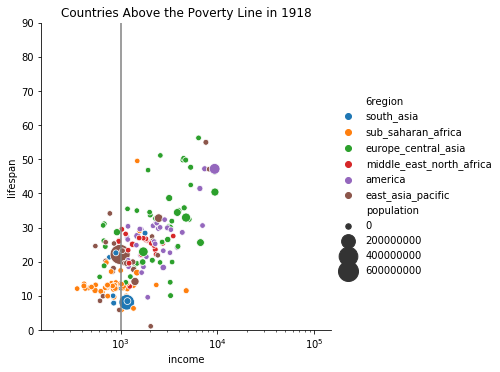

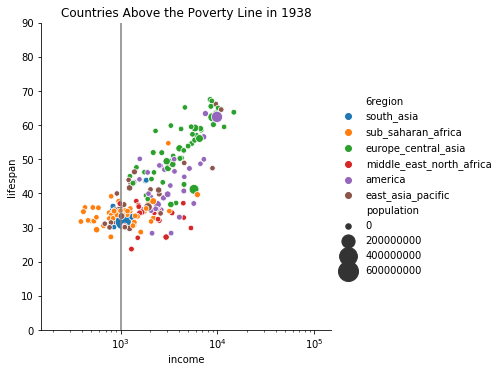

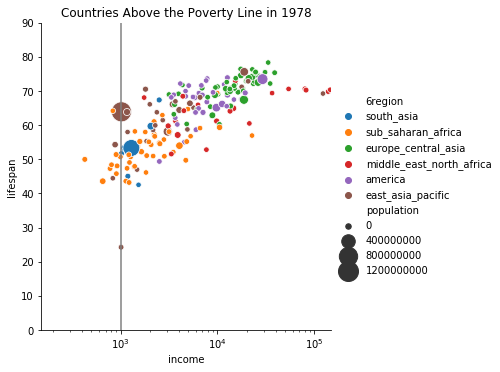

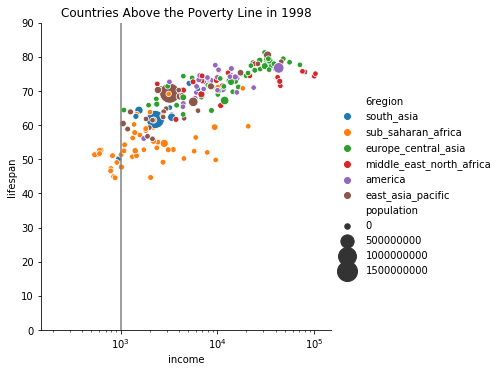

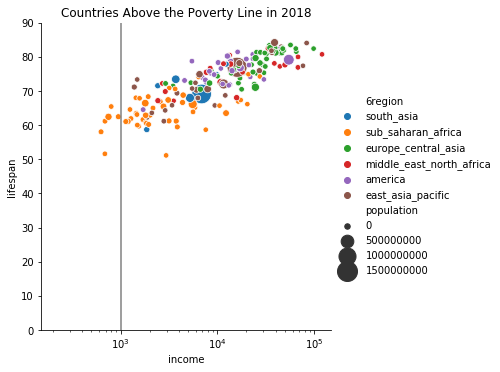

In [52]:
for year in years:
    sns.relplot(x='income', y='lifespan', hue='6region', size='population', 
              sizes=(30,400), data=df[df.year==year])
    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((0, 90))
    plt.title('Countries Above the Poverty Line in ' + str(year))
    plt.axvline(x=1000, color='grey')